In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

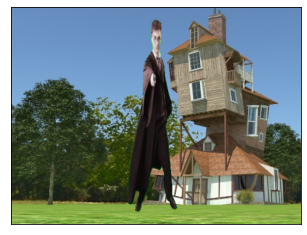

In [2]:
# 1.1a
img1 = cv2.imread('../images/fg.jpg')
img2 = cv2.imread('../images/bg.jpg')

img1 = cv2.resize(img1, (480,360))
img2 = cv2.resize(img2, (480,360))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# defining green color threshold
lower_green = np.array([0, 100, 0])    
upper_green = np.array([120, 255, 100])

# creating mask
mask = cv2.inRange(img1, lower_green, upper_green)
img1[mask != 0] = [0, 0, 0]

# Mask the cropped background so that the harry potter area is blocked
img2[mask == 0] = [0, 0, 0]

# Add the two images together to create a complete image!
desired_image = img2 + img1

# Display the result
plt.imshow(desired_image)
plt.xticks([]), plt.yticks([]) 
plt.show()

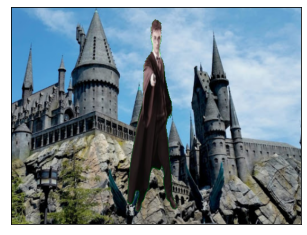

In [3]:
# 1.1b
hogwarts = cv2.imread('../images/hogwarts.jpg')
hogwarts = cv2.resize(hogwarts, (480,360))
hogwarts = cv2.cvtColor(hogwarts, cv2.COLOR_BGR2RGB)

hogwarts[mask == 0] = [0, 0, 0]

final_image = hogwarts + img1
plt.imshow(final_image)
plt.xticks([]), plt.yticks([]) 
plt.show()

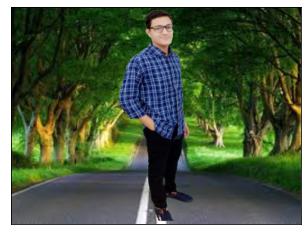

In [4]:
# 1.1c
img1 = cv2.imread('../images/me.jpg')
img2 = cv2.imread('../images/forest.jpeg')

img1 = cv2.resize(img1, (480,360))
img2 = cv2.resize(img2, (480,360))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# defining green color threshold
lower_green = np.array([0, 100, 0])    
upper_green = np.array([120, 255, 100])

# creating mask
mask = cv2.inRange(img1, lower_green, upper_green)
img1[mask != 0] = [0, 0, 0]

# Mask the cropped background so that the harry potter area is blocked
img2[mask == 0] = [0, 0, 0]

# Add the two images together to create a complete image!
desired_image = img2 + img1

# Display the result
plt.imshow(desired_image)
plt.xticks([]), plt.yticks([]) 
plt.show()

# Solution for 1.2

Each colored image's pixel has 3 channels for R,G,B.

Let n be the number of images, therefore by size equalization:

size of n images = size of storage

n x (720 x 576) x 3 = 2 x 2^30  (1GB = 2^30 bytes)

n ~ 1726

# Solution for 2

As the image is of square shape(n x n) and each pixel has 3 channels for R,G,B.

so by equating sizes:

size of 200 images = size of storage

200 x (n^2) x 3 = 500 x 2^20 (1MB = 2^20 bytes)

n ~ 934

# Solution for 3

We know that magnification of lens is:

(-v/u) = (height of image/height of object)

where v: image distance from optical center of lens

      u: object distance from optical center of lens
      
By len's formula we know that:

1/f = 1/v + 1/u

where f: focal length of lens

so from len's formula we have v = (uf/u-f)

substituting value of v in magnification formula, we have:

-(uf/u-f)/(u) = (ht. of image/ht. of object)

f/(f-u) = ht.of image/ht. of object

Given f = 43.5cm = 0.435 meters

      u = 240 meters
      
      ht. of object = asked
      
      ht. of image?

It can be obtained from the image dimensions given in the question. Given that the dimension of the sensor is 10mm x 10mm with 1024 x 1024 pixel, and we need height of image to be atleast 390 pixels.

So image height we need = (390/1024)*10 mm ~ 0.0038 meters

Substituting values in the magnification formula above, we have:

(0.435)/(0.435-240) = (0.0038)/ht.of object

therefore, height of object ~ -2.1 meters

-ve sign appears because image formed by convex lens is inverted.(assuming primary lens used in camera is convex)

So, the height of image is close to 2.1 meters.

   

In [7]:
# 4.1 
def bitQuantizeImage(path,k):
    img = cv2.imread(path)
    img = np.right_shift(img,8-k)
    img = np.left_shift(img,8-k)        #shifting it to left increses brightness
    return img   

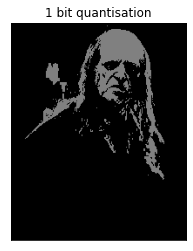

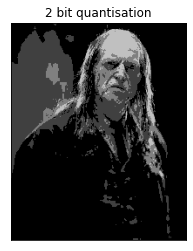

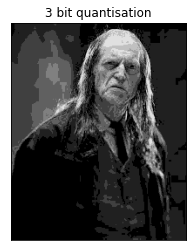

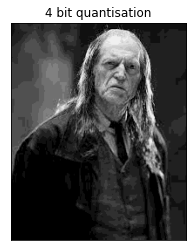

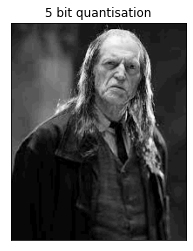

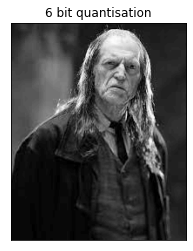

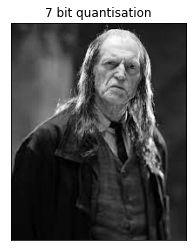

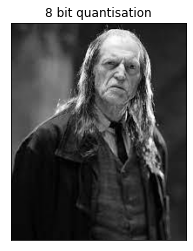

In [8]:
# 4.2
for i in range(1,9):
    plt.title('{} bit quantisation'.format(i))
    plt.imshow(bitQuantizeImage('../images/filch.jpg',i))
    plt.xticks([]), plt.yticks([]) 
    plt.show()


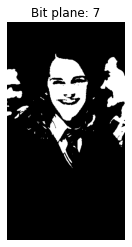

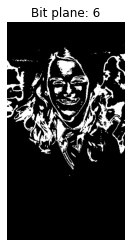

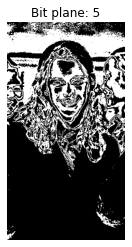

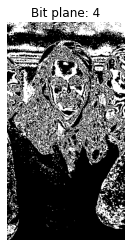

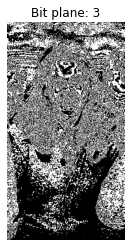

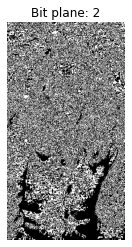

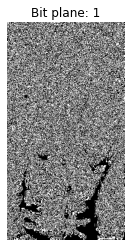

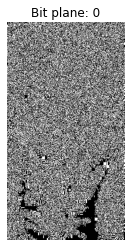

In [9]:
# 4.3
# read the image in gray-scale
img = cv2.imread('../images/hermoine.jpg',0)
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
            

for i in range(8):
    plt.axis('off')
    plt.imshow((np.array([int(elem[i]) for elem in lst],dtype = np.uint8) * pow(2,7-i)).reshape(img.shape[0],img.shape[1]),cmap='gray')
    plt.title('Bit plane: {}'.format(7-i))
    plt.xticks([]), plt.yticks([]) 
    plt.show()    


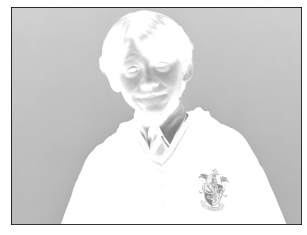

In [10]:
# 4.4
# Roll number is 2019101056, therefore k=2019101056%5 = 1. (finding corrution procedure for image of ron)

# converting image to grayscale
img = cv2.imread('../images/ron.jpg',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# manipulating image pixels
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            val = 255-img[y,x,c]   #taking image -ve
            val+=100     #increasing each histogram value by some threshold
            if val>255:
                val=255
            img[y,x,c] = val
            
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

Corruption Procedure:- We first converted the given image to grayscale image. After that we took the image -ve. 
Still the image looked somewhat gray. So we added a threshold value of 100 making image's histogram shifting towards white side, and thus we obtained ron corrupt image much similar to what is given

In [11]:
# 5.1
def linContrastStretching(im,a,b):
    new_img = np.zeros(img.shape, img.dtype)
    ma = np.max(img)
    mi = np.min(img)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                val = a + (((img[y,x,c]-mi)*(b-a))/(ma-mi))
                if val>b:
                    val=b
                new_img[y,x,c] = val
                    
    return new_img

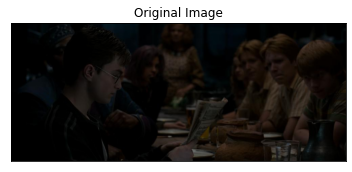

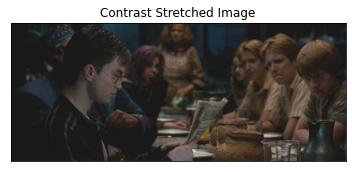

In [12]:
# 5.2
img = cv2.imread('../images/phoenix-bad.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]), plt.yticks([]) 
plt.title('Original Image')
plt.show()  

improved_intensity_image = linContrastStretching(img,25,230)
plt.imshow(improved_intensity_image)
plt.xticks([]), plt.yticks([]) 
plt.title('Contrast Stretched Image')
plt.show()  

The 100 most frequent colours:
[[25 25 25]
 [26 26 26]
 [28 28 28]
 [26 25 25]
 [26 28 32]
 [25 26 30]
 [25 26 25]
 [28 30 33]
 [39 30 25]
 [25 25 28]
 [30 28 25]
 [25 28 26]
 [28 28 25]
 [35 28 25]
 [30 30 30]
 [26 26 25]
 [28 26 25]
 [30 30 26]
 [26 30 28]
 [33 26 25]
 [33 32 28]
 [32 30 26]
 [37 28 25]
 [40 32 26]
 [25 32 33]
 [28 32 30]
 [32 32 28]
 [32 32 32]
 [26 46 56]
 [35 28 26]
 [28 37 44]
 [33 33 30]
 [40 32 25]
 [35 33 30]
 [25 32 37]
 [26 33 35]
 [35 35 32]
 [32 25 25]
 [30 32 35]
 [37 30 25]
 [26 33 39]
 [30 25 25]
 [28 35 37]
 [42 33 28]
 [39 32 26]
 [33 33 33]
 [42 33 26]
 [26 35 42]
 [30 33 32]
 [37 35 32]
 [37 37 33]
 [44 35 28]
 [37 30 28]
 [28 25 26]
 [28 35 40]
 [46 37 30]
 [25 44 55]
 [32 35 33]
 [67 51 35]
 [39 39 35]
 [39 32 30]
 [28 47 58]
 [35 35 35]
 [44 35 30]
 [63 47 32]
 [30 39 46]
 [65 49 33]
 [33 37 35]
 [25 30 32]
 [40 33 28]
 [69 53 37]
 [62 46 30]
 [53 35 32]
 [46 37 32]
 [35 26 25]
 [51 33 30]
 [42 28 25]
 [47 39 32]
 [25 30 35]
 [58 49 39]
 [63 46 3

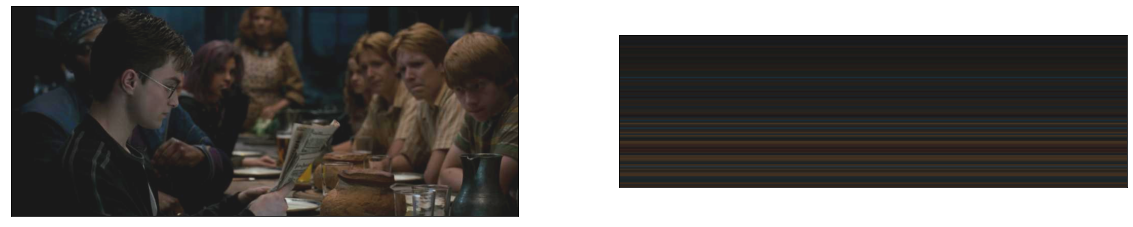

The 100 most frequent colours:
[[ 0  0  0]
 [ 1  1  1]
 [ 2  2  2]
 [ 1  0  0]
 [ 1  2  4]
 [ 0  1  3]
 [ 0  1  0]
 [ 2  3  5]
 [ 8  3  0]
 [ 0  0  2]
 [ 3  2  0]
 [ 0  2  1]
 [ 2  2  0]
 [ 6  2  0]
 [ 3  3  3]
 [ 1  1  0]
 [ 2  1  0]
 [ 3  3  1]
 [ 1  3  2]
 [ 5  1  0]
 [ 5  4  2]
 [ 4  3  1]
 [ 7  2  0]
 [ 9  4  1]
 [ 0  4  5]
 [ 2  4  3]
 [ 4  4  2]
 [ 4  4  4]
 [ 1 12 18]
 [ 6  2  1]
 [ 2  7 11]
 [ 5  5  3]
 [ 9  4  0]
 [ 6  5  3]
 [ 0  4  7]
 [ 1  5  6]
 [ 6  6  4]
 [ 4  0  0]
 [ 3  4  6]
 [ 7  3  0]
 [ 1  5  8]
 [ 3  0  0]
 [ 2  6  7]
 [10  5  2]
 [ 8  4  1]
 [ 5  5  5]
 [10  5  1]
 [ 1  6 10]
 [ 3  5  4]
 [ 7  6  4]
 [ 7  7  5]
 [11  6  2]
 [ 7  3  2]
 [ 2  0  1]
 [ 2  6  9]
 [12  7  3]
 [ 0 11 17]
 [ 4  6  5]
 [24 15  6]
 [ 8  8  6]
 [ 8  4  3]
 [ 2 13 19]
 [ 6  6  6]
 [11  6  3]
 [22 13  4]
 [ 3  8 12]
 [23 14  5]
 [ 5  7  6]
 [ 0  3  4]
 [ 9  5  2]
 [25 16  7]
 [21 12  3]
 [16  6  4]
 [12  7  4]
 [ 6  1  0]
 [15  5  3]
 [10  2  0]
 [13  8  4]
 [ 0  3  6]
 [19 14  8]
 [22 12  

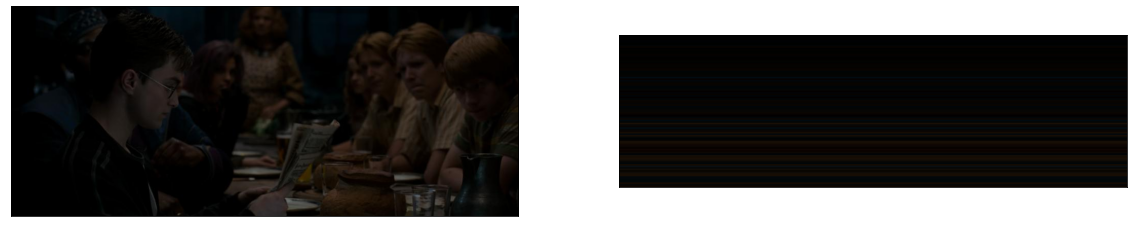

In [14]:
# 5.3 take an image and display k most frequent colors as colorbars
def colorbars(k,im):
    dims = im.shape
    op = np.reshape(im,(dims[0]*dims[1],3))
    op = np.unique(op,axis=0,return_counts=True)
    indices = np.argsort(op[1])
    width = 3
    colorbar = np.empty([width*k,10,3])
    print("The",k,"most frequent colours:")
    print(op[0][indices[::-1][:k]])
    for index,row in enumerate(op[0][indices[::-1][:k]]):
        colorbar[index*width:(index+1)*width,:,:] = row
    fig = plt.figure(figsize=(20,20))
    fig.add_subplot(1,2,1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(im)
    fig.add_subplot(1,2,2)
    colorbar = colorbar.astype(int)
    plt.xticks([]), plt.yticks([])
    plt.imshow(colorbar,aspect=float(1.0/float(k)))
    plt.show()
    
# original image
org_img = cv2.imread('../images/phoenix-bad.jpg')
org_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
colorbars(100,improved_intensity_image)   
colorbars(100, org_img)

Explanation:- We see that the colorbars of the original image are less contrasting and have more shades of black color, whereas the modified image has more contrasting colors. The reason is simple because we increased the contrast of the original image to obtain the modified image which has comparitively high contrast.

In [15]:
# 6.1
def piecewiseLinTransform(im,l,r,a,b):
    im = im.astype(float)/255
    op = im
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            for k in range(len(a)):
                if(im[i,j,0]>=a[k] and im[i,j,0]<b[k]):   #if the co-ordinate lies in range
                    op[i,j] = np.round((im[i,j,0]*l[k]+r[k])*255)

    return op.astype(np.uint8)    #returing image having range 0-255

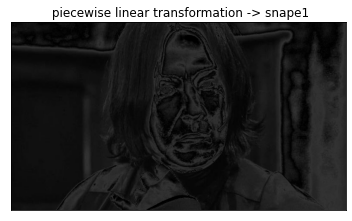

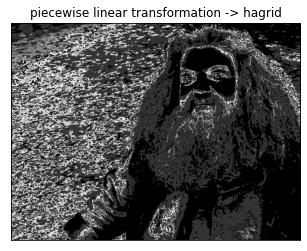

In [16]:
# 6.2
snape1 = cv2.imread("../images/snape1.jpg")
op_snape1 = piecewiseLinTransform(snape1,[1.0, -2.0, 1.0, -2.0, 1.0, -2.0],[0.0, 0.6, -0.3, 1.2, -0.6, 1.8],[0.0, 0.2, 0.3, 0.5, 0.6, 0.8],[0.2, 0.3, 0.5, 0.6, 0.8, 0.9])
plt.imshow(op_snape1) 
plt.title(' piecewise linear transformation -> snape1')
plt.xticks([]), plt.yticks([]) 
plt.show()

hagrid = cv2.imread("../images/hagrid.jpg")
op_hagrid = piecewiseLinTransform(hagrid,[0.0, 0.0, 7.0, -7.0, 0.0, 0.0],[0.0, 0.2, -1.4, 1.4, 0.2, 0.0],[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],[0.1, 0.2, 0.3, 0.4, 0.5, 0.9])
plt.imshow(op_hagrid) 
plt.title('piecewise linear transformation -> hagrid')
plt.xticks([]), plt.yticks([]) 
plt.show()


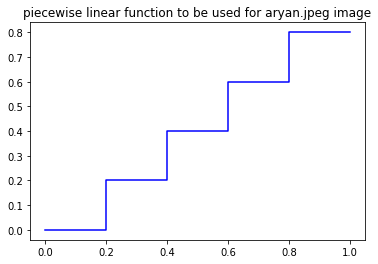

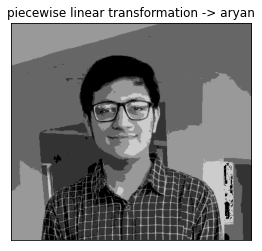

In [17]:
#6(3)
# the funtion used for the below image is plotted
x = [0.0, 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0]
y = [0.0, 0.0, 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
plt.plot(x,y, color='blue')
plt.title('piecewise linear function to be used for aryan.jpeg image')
plt.figure()

aryan = cv2.imread("../images/aryan.jpeg",0)
aryan = cv2.cvtColor(aryan, cv2.COLOR_BGR2RGB)
op_aryan = piecewiseLinTransform(aryan,[0.0, 0.0, 0.0, 0.0, 0.0],[0.0, 0.2, 0.4, 0.6, 0.8],[0.0, 0.2, 0.4, 0.6, 0.8],[0.2, 0.4, 0.6, 0.8, 1.0])
plt.imshow(op_aryan) 
plt.title('piecewise linear transformation -> aryan')
plt.xticks([]), plt.yticks([]) 
plt.show()

Explanation:- we will take consider the function given peicewse
so that from a->b we have a straight line and we can alter those points of image piecewisely

In [70]:
# 7.1
def histEqualization(im):
    hist_cnt = np.zeros((256,),dtype=np.int32)
    height, width = im.shape

    #finding histogram count
    for i in range(width):
        for j in range(height):
            hist_cnt[im[j,i]] += 1  

    constant = 1.0/(height*width)
    eq_hist = np.zeros((256,),dtype=np.float16)
    cdf = np.zeros((256,),dtype=np.float16)   

    cdf[0] = (hist_cnt[0]*constant)
    for i in range(256):
        eq_hist[i] = round(255*cdf[i])
        if i+1<256:
            cdf[i+1] = cdf[i] + (hist_cnt[i+1]*constant)

    #Re-map values from equalized histogram into the image
    for i in range(width):
        for j in range(height):
            im[j,i]= eq_hist[im[j,i]]

    return im

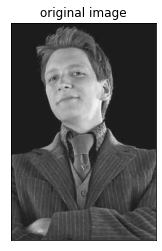

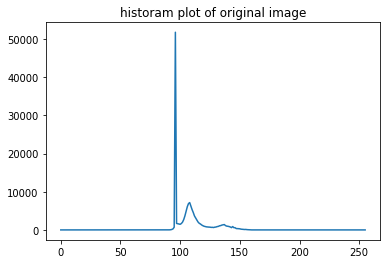

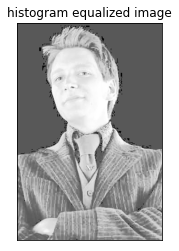

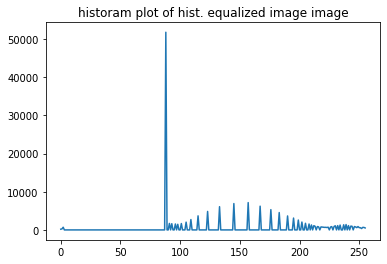

In [44]:
# 7.2
img = cv2.imread("../images/fred.jpeg",0)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.xticks([]), plt.yticks([]) 
plt.show()

# histogram plots
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr)
plt.title('historam plot of original image')
plt.show()

# histogram equalization
hist_equalized_img = histEqualization(img)

plt.imshow(hist_equalized_img, cmap='gray')
plt.title('histogram equalized image')
plt.xticks([]), plt.yticks([]) 
plt.show()

# histogram plots
histr = cv2.calcHist([hist_equalized_img],[0],None,[256],[0,256])
plt.plot(histr)
plt.title('historam plot of hist. equalized image image')
plt.show()

Explanation:- Original Image has values concentrated between 100-150. But after applying histogram equalization values are distributed from 100 to 255. The new image looks more clear than original image.

In [30]:
# 7.3
def hist_match(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    return interp_t_values[bin_idx].reshape(oldshape)

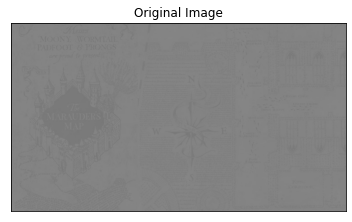

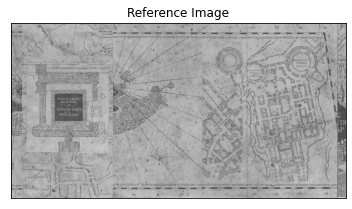

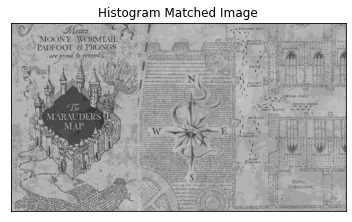

In [34]:
# 7.4
map_img = cv2.imread("../images/map.jpeg",0)
plt.imshow(cv2.imread('../images/map.jpeg'))
plt.xticks([]), plt.yticks([])
plt.title("Original Image")
plt.show()

map_ref = cv2.imread("../images/map-reference.jpeg",0)
plt.imshow(map_ref, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Reference Image")
plt.show()

result = hist_match(map_img,map_ref)                       
plt.imshow(result, cmap='gray')
plt.title("Histogram Matched Image")
plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
# 8.1
def gammaTransform(im,y):
    im = im.astype(float)/255
    return np.round(im**y).astype(np.uint8)*255

Observation: When gamma is less than 1 and applied on a darker image, it turns bright. On the other hand when gamma is more than 1 and applied on a brighter image, it becomes dark.

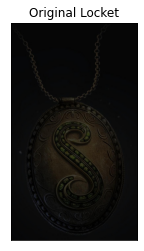

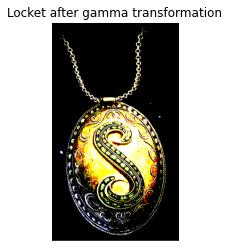

In [55]:
# 8.2
locket = cv2.imread('../images/locket.jpeg')
locket = cv2.cvtColor(locket, cv2.COLOR_BGR2RGB)
plt.imshow(locket)
plt.xticks([]), plt.yticks([])
plt.title("Original Locket")
plt.show()

gamma_locket = gammaTransform(locket, 0.265)
plt.imshow(gamma_locket)
plt.xticks([]), plt.yticks([])
plt.title("Locket after gamma transformation")
plt.show()

Observation:- As the input image is darker, so we have to apply gamma transformation in such a way that it becomes brighter(increase brightness). From gamma-transformation plot, it is evident that if gamma is kept less than 1, then it shifts towards brighter side of image. Hence we kept gamma to 0.265(<1) and the output image is brighter now.

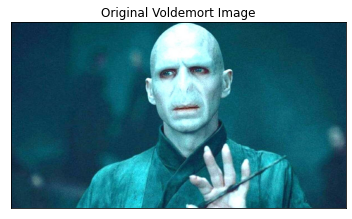

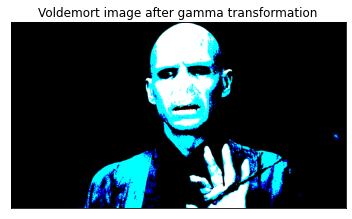

In [25]:
# 8.3
voldemort = cv2.imread('../images/voldemort.jpeg')
voldemort = cv2.cvtColor(voldemort, cv2.COLOR_BGR2RGB)
plt.imshow(voldemort)
plt.xticks([]), plt.yticks([])
plt.title("Original Voldemort Image")
plt.show()

gamma_voldemort = gammaTransform(voldemort, 1.5)
plt.imshow(gamma_voldemort)
plt.xticks([]), plt.yticks([])
plt.title("Voldemort image after gamma transformation")
plt.show()

Observation:- As the input image is brighter, so we have to apply gamma transformation in such a way that it becomes a bit darker. From gamma-transformation plot, it is evident that if gamma is kept more than 1, then it shifts towards darker(decrease in brightness) side. Hence we kept gamma to 1.5(>1) and the output image is darker now.

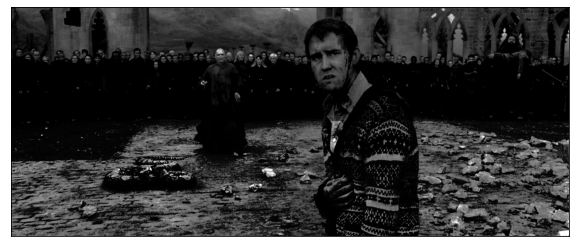

In [92]:
# 9
# top left image
part1 = cv2.imread("../images/neville1.jpg",0)

# top right image
part2 = cv2.imread("../images/neville2.jpg",0)

# bottom left image
part3 = cv2.imread("../images/neville3.jpg",0)

# bottom right image
part4 = cv2.imread("../images/neville4.jpg",0)
part4 = histEqualization(part4)

part1 = hist_match(part1, part3)
part2 = hist_match(part2, part3)

for i in range(part1.shape[0]):
    for j in range(part1.shape[1]):
        val = part1[i,j] - 25
        if val<0:
            val=0
        part1[i,j]=val

part2 = hist_match(part2, part1)
part4 = hist_match(part4, part3)
    
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

op = np.zeros([395*2,960+960])
op[:395,:960] = part1
op[:395,960:] = part2
op[395:,:960] = part3
op[395:,960:] = part4

plt.xticks([]), plt.yticks([])
plt.imshow(op, cmap='gray')
plt.show()